In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('C:/Users/USER/Desktop/Intern_data/Python/임원 데이터.csv', encoding = 'utf-8')

In [3]:
df

,Date,NHO-N
0,2010년_상,1.7
1,2010년_하,1.4
2,2011년_상,1.8
3,2011년_하,0.8
4,2012년_상,1.0
5,2012년_하,0.2
6,2013년_상,1.0
7,2013년_하,0.4
8,2014년_상,0.5
9,2014년_하,1.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    26 non-null     object 
 1   NHO-N   25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 544.0+ bytes


In [5]:
df1 = df.fillna(df.mean()) #결측치 평균값으로 대체

In [6]:
df1

,Date,NHO-N
0,2010년_상,1.700
1,2010년_하,1.400
2,2011년_상,1.800
3,2011년_하,0.800
4,2012년_상,1.000
5,2012년_하,0.200
6,2013년_상,1.000
7,2013년_하,0.400
8,2014년_상,0.500
9,2014년_하,1.400


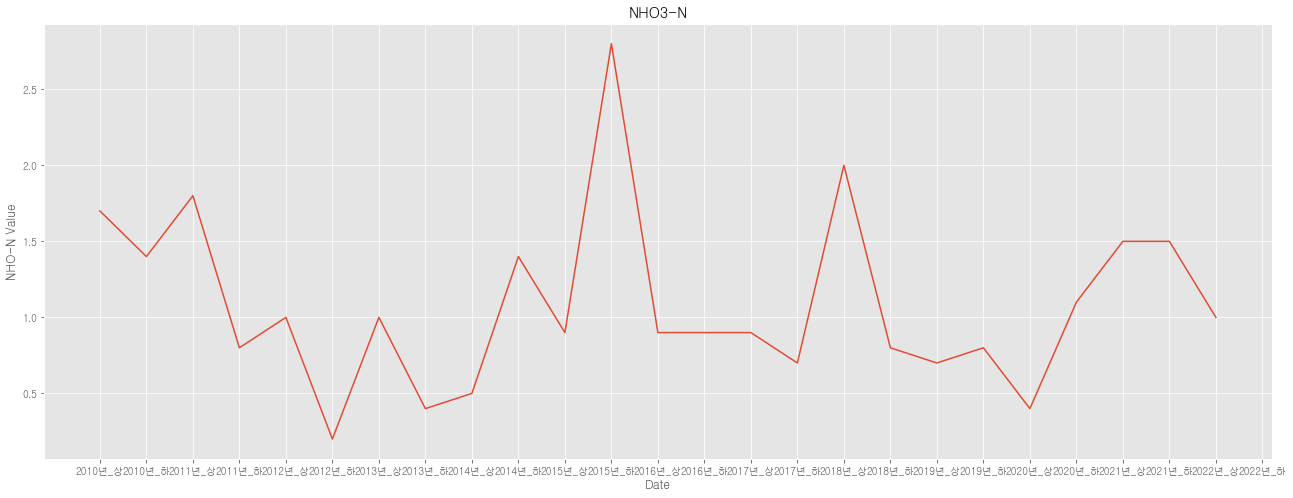

In [7]:
plt.figure(figsize=(22,8))
plt.plot(df['Date'], df['NHO-N'])
plt.title("NHO3-N")
plt.xlabel("Date")
plt.ylabel("NHO-N Value")
plt.show()

In [8]:
#TimeSeries 형태로 변경
timeSeries = df1.loc[:, ["Date", "NHO-N"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis = 1)
ts

,NHO-N
Date,
2010년_상,1.700
2010년_하,1.400
2011년_상,1.800
2011년_하,0.800
2012년_상,1.000
2012년_하,0.200
2013년_상,1.000
2013년_하,0.400
2014년_상,0.500


<Figure size 432x288 with 0 Axes>

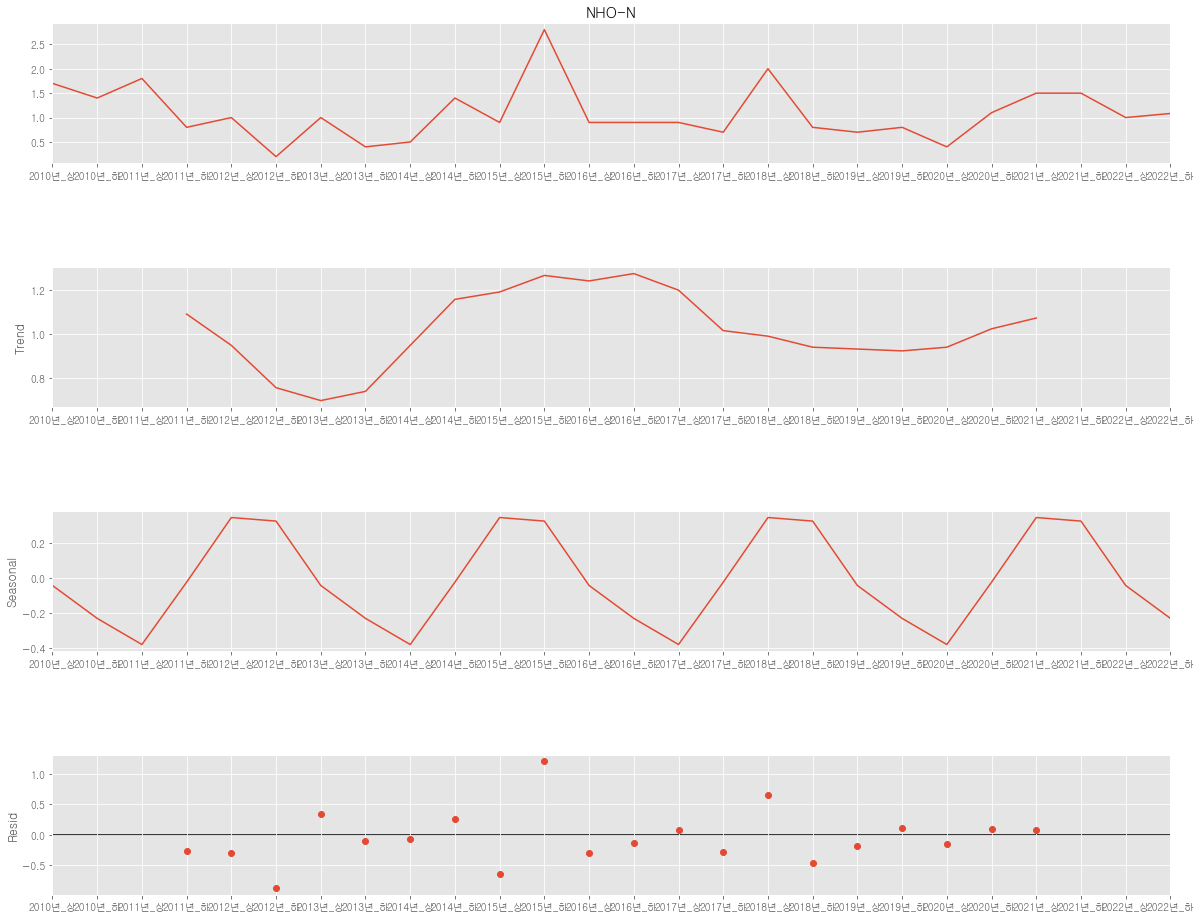

In [9]:
#시계열 분해법
from statsmodels.tsa.seasonal import seasonal_decompose
# 반기 주기라 period = 6으로 설정
result = seasonal_decompose(ts['NHO-N'], model='additive', period= 6)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

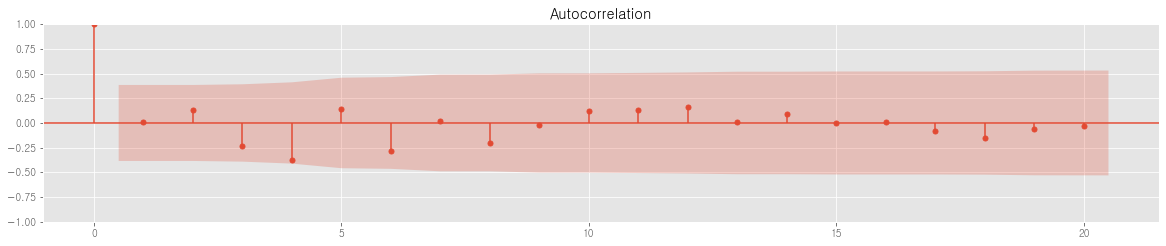

In [10]:
#ACF 그래프
import statsmodels.api as sm

fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)

In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print ('ADF Statistic : %f' % result[0])
print ('p-value: %f' % result[1])
print ('Critical Value: ')
for key, value in result[4]. items():
    print('\t%s : %.3f' % (key, value))

ADF Statistic : -3.500987
p-value: 0.007962
Critical Value: 
	1% : -3.924
	5% : -3.068
	10% : -2.674


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



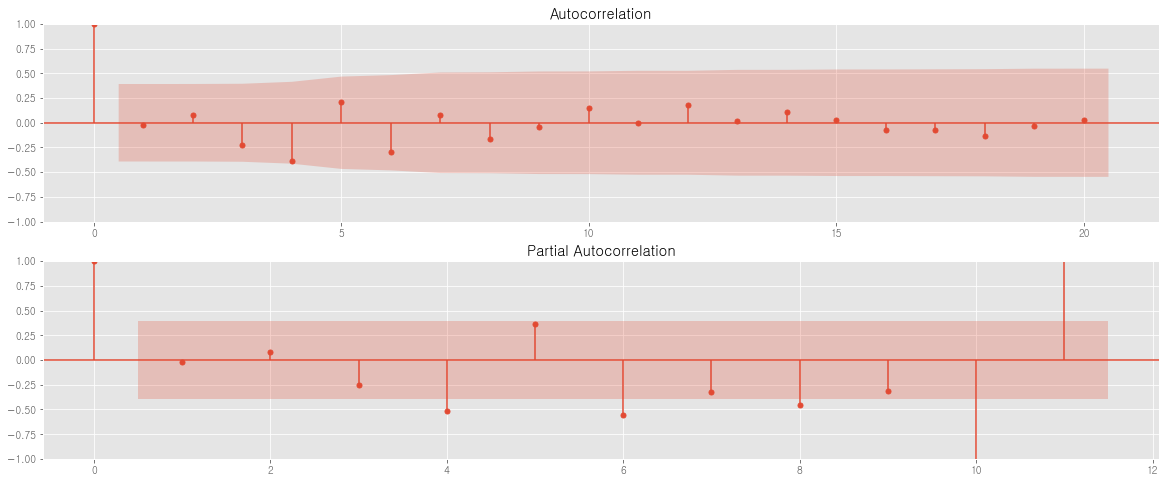

In [12]:
# ACF와 PACF그래프
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts[1:], lags = 20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts[1:], lags=11 , ax=ax2)

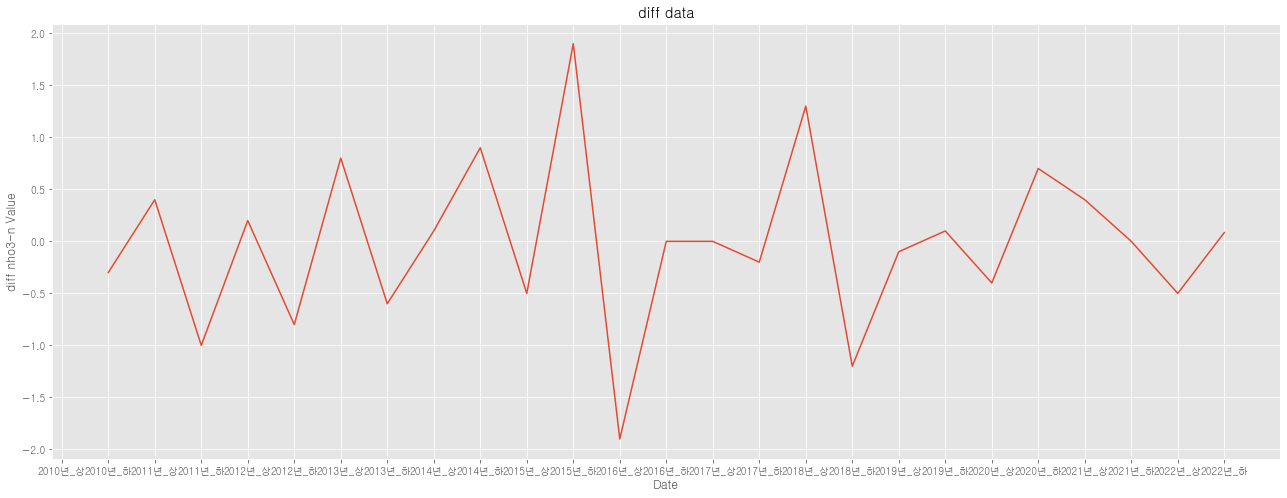

In [13]:
#1차 차분
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title("diff data")
plt.xlabel("Date")
plt.ylabel("diff nho3-n Value")
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



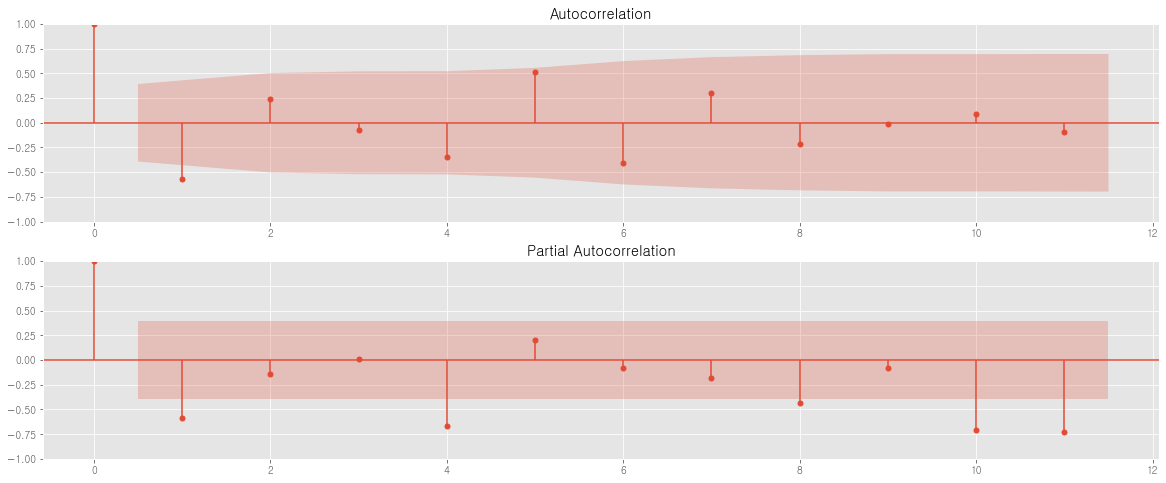

In [14]:
#차분한 값 ACF & PACF
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags = 11, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags= 11 , ax=ax2)

In [15]:
#귀납
result = adfuller(ts_diff[1:])
print ('ADF Statistic : %f' % result[0])
print ('p-value: %f' % result[1])
print ('Critical Value: ')
for key, value in result[4]. items():
    print('\t%s : %.3f' % (key, value))

ADF Statistic : -4.578017
p-value: 0.000142
Critical Value: 
	1% : -3.788
	5% : -3.013
	10% : -2.646


In [16]:
ts_diff #결측이 왜 생김????

,NHO-N
Date,
2010년_상,NaN
2010년_하,-0.300
2011년_상,0.400
2011년_하,-1.000
2012년_상,0.200
2012년_하,-0.800
2013년_상,0.800
2013년_하,-0.600
2014년_상,0.100


In [17]:
ts_diff = ts_diff.fillna(ts_diff.mean()) #차분값 결측값 제거

In [18]:
ts_diff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 2010년_상 to 2022년_하
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NHO-N   26 non-null     float64
dtypes: float64(1)
memory usage: 416.0+ bytes


In [19]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

<ipython-input-19-b4e08b84091a>:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [20]:
model = ARIMA(ts_diff, order= (2,1,2))
model_fit = model.fit(disp = 0)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
print(model_fit.summary())

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.show()